# Learning Curves

** ACKNOWLEDGEMENT **

Code in this notebook is modified from Jake VanderPlas (https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Bias-Variance-Tradeoff)

For Jake's explanation of learning curves, see https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html

## Set up the functions and libraries

In [1]:
import numpy as np

# Simulate a dataset containing one feature (and one target)
# The feature values are contained in X
# The target values are contained in y
def make_data(N=100, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [2]:
# For plotting
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# For building models and measuring their performance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tt_split

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

## Generate a dataset and fit it with a high bias and a high variance model

In [4]:
# Create the complete dataset - total size = N
X, y = make_data(N=100, rseed=42)

In [5]:
# Split the dataset into training and test data
X_train, X_test, y_train, y_test = tt_split(X, y, test_size=0.2, random_state=42)
# Keep the test data the same throughout

In [6]:
# Get the first num_datapoints from the training dataset
def get_training_slice(num_datapoints):
    xTrainSlice = X_train[0:num_datapoints]
    yTrainSlice = y_train[0:num_datapoints]
    return xTrainSlice, yTrainSlice

In [7]:
# Test it out
xTrainSlice, yTrainSlice = get_training_slice(3)
xTrainSlice, yTrainSlice

(array([[0.84985211],
        [0.78714645],
        [0.03986962]]), array([9.0020549 , 9.6434913 , 2.57631297]))

In [8]:
# Train a model with num_datapoints rows of the training dataset
def train_models(num_datapoints):
    # Get the slice of the training data on which the model is trained
    xTrainSlice, yTrainSlice = get_training_slice(num_datapoints)
    
    # Train the model on the slice of training data
    # The high bias model is a polynomial of degree 1
    model_hb = PolynomialRegression(1).fit(xTrainSlice, yTrainSlice)
    # The high variance model is a polynomial of degree 20
    model_hv = PolynomialRegression(20).fit(xTrainSlice, yTrainSlice)
    
    return xTrainSlice, yTrainSlice, model_hb, model_hv

In [9]:
# Test it out
xTrainSlice, yTrainSlice, model_hb, model_hv = train_models(10)
xTrainSlice, yTrainSlice, model_hb, model_hv;
# Quick Check on Performance
# MSE for the high-bias model
print("MSE for the high-bias model: {}".format(mse(y_test, model_hb.predict(X_test))))
# MSE for the high-variance model
print("MSE for the high-variance model: {}".format(mse(y_test, model_hv.predict(X_test))))

MSE for the high-bias model: 2.868030782849007
MSE for the high-variance model: 65010267352.36102


In [10]:
# For models trained on num_datapoints rows of the training dataset, show fit and performance
# on the rows of the training dataset and the entire test dataset
def plot_prediction_performance(num_datapoints):
    
    xTrainSlice, yTrainSlice, model_hb, model_hv = train_models(num_datapoints)
    
    # A set of points on the x axis for plotting purposes
    xfit = np.linspace(-0.1, 1.0, 1000)[:, None]

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
    
    # High-Bias Model: Scatter plot of the training dataset slice
    ax[0].scatter(xTrainSlice.ravel(), yTrainSlice, s=40, c='blue')
    # Plot of the predictions trained on the training dataset slice 
    ax[0].plot(xfit.ravel(), model_hb.predict(xfit), color='red')
    ax[0].axis([-0.1, 1.0, -2, 14])
    ax[0].set_title('High-Bias Model\n' + '# Training Datapoints = ' + str(num_datapoints) + "\n" + '# Test Datapoints = ' + str(len(y_test)), size=14)
    ax[0].scatter(X_test.ravel(), y_test, s=40, c='green')
    ax[0].text(0.02, 0.98, "training data $MSE$ = {0:.2f}".format(mse(yTrainSlice, model_hb.predict(xTrainSlice))),ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
    ax[0].text(0.02, 0.91, "test data $MSE$ = {0:.2f}".format(mse(y_test, model_hb.predict(X_test))),ha='left', va='top', transform=ax[0].transAxes, size=14, color='green')
    
    # High-Variance Model: Scatter plot of the training dataset slice
    ax[1].scatter(xTrainSlice.ravel(), yTrainSlice, s=40, c='blue')
    # Plot of the predictions trained on the training dataset slice 
    ax[1].plot(xfit.ravel(), model_hv.predict(xfit), color='red')
    ax[1].axis([-0.1, 1.0, -2, 14])
    ax[1].set_title('High-Variance Model\n' + '# Training Datapoints = ' + str(num_datapoints) + "\n" + '# Test Datapoints = ' + str(len(y_test)), size=14)
    ax[1].scatter(X_test.ravel(), y_test, s=40, c='green')
    ax[1].text(0.02, 0.98, "training data $MSE$ = {0:.2f}".format(mse(yTrainSlice, model_hv.predict(xTrainSlice))),ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
    ax[1].text(0.02, 0.91, "test data $MSE$ = {0:.2f}".format(mse(y_test, model_hv.predict(X_test))),ha='left', va='top', transform=ax[1].transAxes, size=14, color='green')

## Prediction Performance as Training Dataset Size Increases

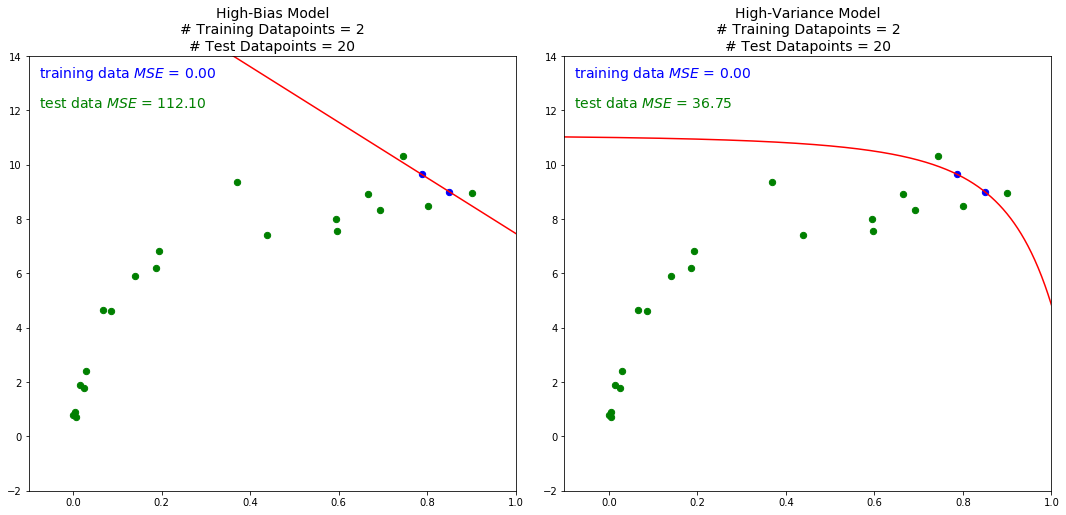

In [11]:
plot_prediction_performance(2)

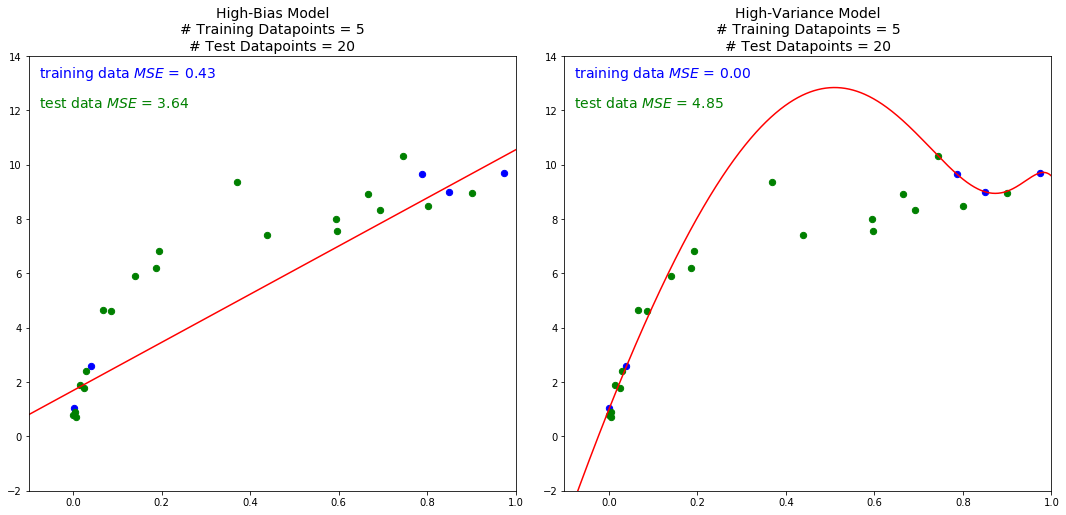

In [12]:
plot_prediction_performance(5)

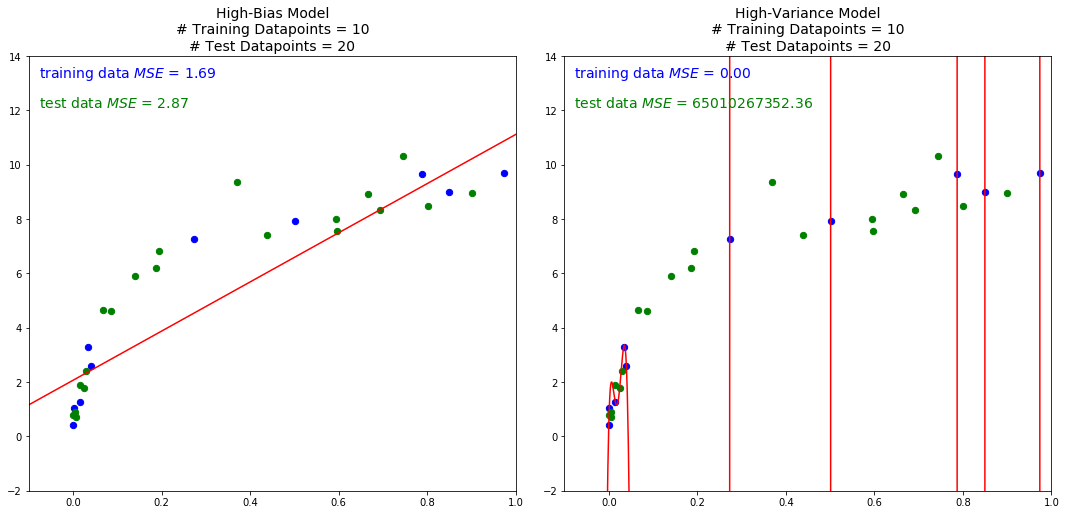

In [13]:
plot_prediction_performance(10)

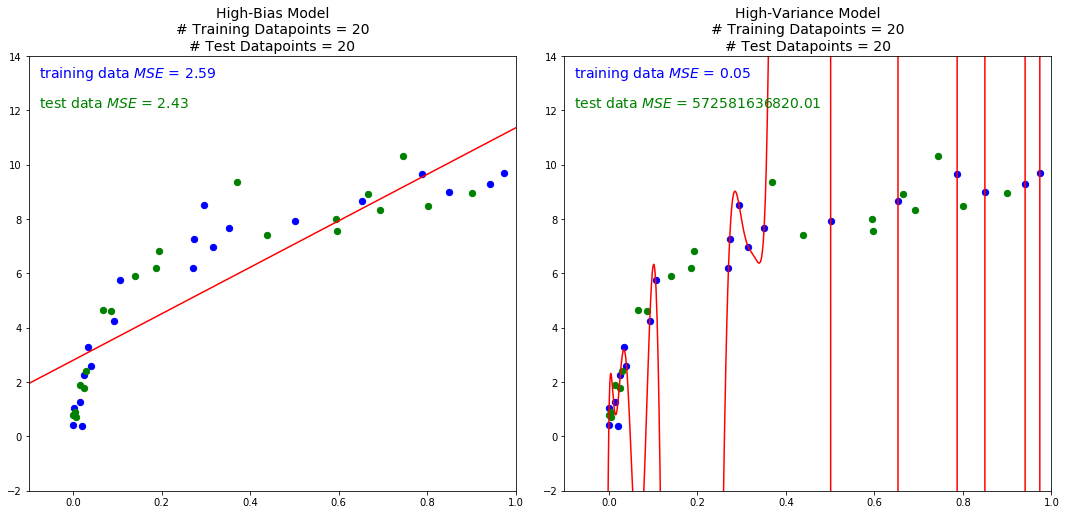

In [14]:
plot_prediction_performance(20)

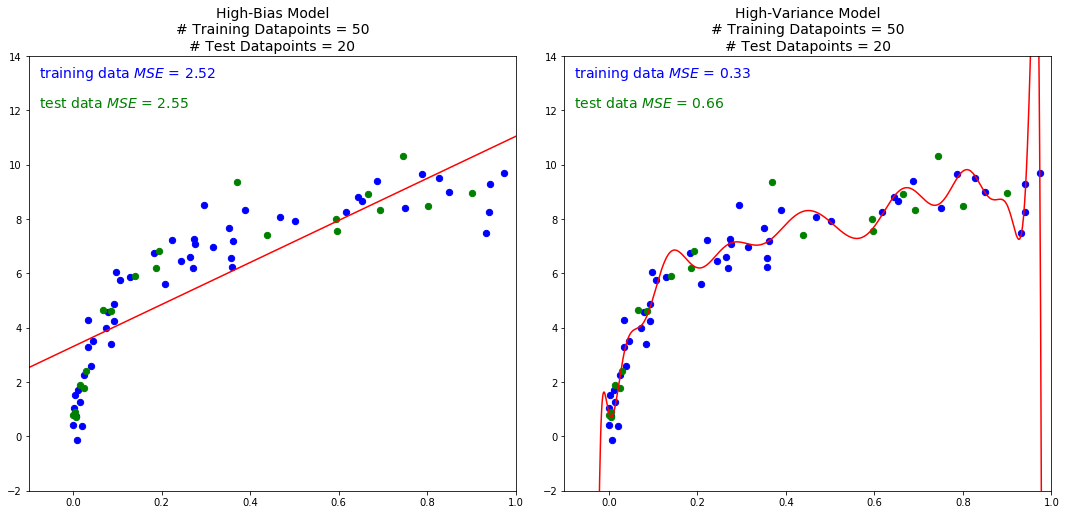

In [15]:
plot_prediction_performance(50)

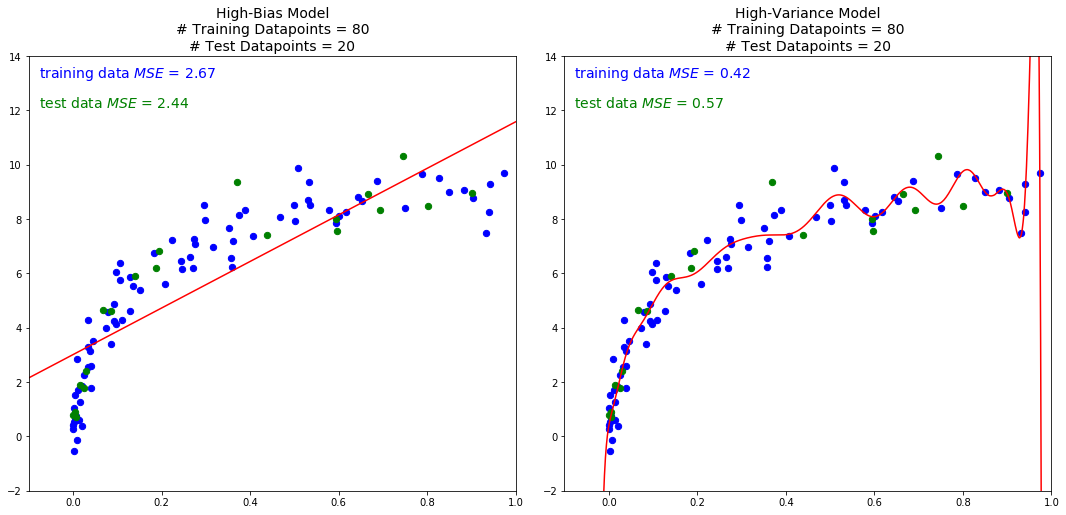

In [16]:
plot_prediction_performance(80)